<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Assignment Questions </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement



### About the data set (Rainfall Prediction data)

The dataset contains information about rainfall predictions. The aim is to find whether rainfall will occur or not based on the several parameters of the atmospheric conditions and profile. <br> Attribute information: 

**Date:** Dates on which rainfall occurred or not 

**Location:** Location where we want to classify rainfall occurrence.

**MinTemp:** Minimum temperature in that particular date

**MaxTemp:** Maximum temperature in that particular date

**Rainfall:** Rainfall occurrence level in cm

**Evaporation:** Evaporation value

**Sunshine:** Sunshine level in m

**WindGustDir:** Direction of wind

**WindGustSpeed:**  Wind Speed

**WindDir9am:** Wind direction at 9am

**WindDir3pm:** Wind direction at 3pm

**WindSpeed9am:** Wind speed at 9am

**WindSpeed3pm:** Wind speed at 3pm

**Humidity9am:** Humidity at 9am

**Humidity3pm:** Humidity at 3pm

**Pressure9am:** Pressure at 9am

**Pressure3pm:** Pressure at 9am

**Cloud9am:** Cloud Cover at 9am

**Cloud3pm:** Cloud Cover at 3pm

**Temp9am:** Temperature at 9am

**Temp3pm:** Temperature at 3pm

**RainToday:** Rain fall happened or not today

**RainTomorrow:** Does tomorrow rainfall will happen or not: Yes(1) or No(0)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Scale the Data](#scale)**
    - 2.8 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
    - 3.1 - **[Identify the Best Cut-off Value](#cut_off)**
        - 3.1.1 - **[Youden's Index](#youden)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


# Inference:
importing the required python libaries for  project:
- numpy, pandas,matplotlib,seaborn is used for the data manipulation and data visulaisation .
- The sklearn LabelEncoder,standardscalar,train_test_split Libaries is used for encoding and data preprocessing purpose.
- Logistic Regression,classification_report,cohen_kappa_score,confusion_matrix,roc_curve,accuracy_score is a set of libaries used for building the Logistic Regression model and To evaluate the performance  of the model.

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the 
first five observations.

In [2]:
df = pd.read_csv("Rainfall_prediction_data.csv")
df.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-03-2012,Wollongong,16.0,20.4,8.2,NaN,NaN,S,63.0,SSW,...,69.0,92.0,1018.5,1017.6,1.0,8.0,17.4,15.6,Yes,Yes
1,06-01-2011,PerthAirport,18.5,25.9,16.0,5.4,11.8,WSW,39.0,SSW,...,60.0,36.0,1004.6,1003.6,7.0,1.0,22.2,25.1,Yes,No
2,29-06-2014,Penrith,8.7,16.5,0.0,NaN,NaN,WNW,56.0,WNW,...,41.0,41.0,NaN,NaN,NaN,NaN,13.1,15.1,No,No
3,16-12-2008,Cairns,25.5,33.9,0.2,5.0,7.0,SSE,41.0,SSE,...,64.0,59.0,1009.8,1007.4,6.0,5.0,30.8,31.5,No,No
4,21-04-2015,SalmonGums,3.8,23.0,0.0,NaN,NaN,N,28.0,NE,...,56.0,29.0,NaN,NaN,NaN,NaN,14.0,21.1,No,No


In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

**Let us now see the number of variables and observations in the data.**

In [4]:
df.shape

(1040, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1040 non-null   object 
 1   Location       1040 non-null   object 
 2   MinTemp        1035 non-null   float64
 3   MaxTemp        1035 non-null   float64
 4   Rainfall       1029 non-null   float64
 5   Evaporation    582 non-null    float64
 6   Sunshine       533 non-null    float64
 7   WindGustDir    969 non-null    object 
 8   WindGustSpeed  969 non-null    float64
 9   WindDir9am     981 non-null    object 
 10  WindDir3pm     1014 non-null   object 
 11  WindSpeed9am   1032 non-null   float64
 12  WindSpeed3pm   1023 non-null   float64
 13  Humidity9am    1031 non-null   float64
 14  Humidity3pm    1016 non-null   float64
 15  Pressure9am    929 non-null    float64
 16  Pressure3pm    932 non-null    float64
 17  Cloud9am       613 non-null    float64
 18  Cloud3pm

# Inference:
- pd.read_csv is function from pandas used to read the given "Rainfall_prediction_data.csv" dataset.
- df.head(5) - It displays the first 5 rows of the dataset.
- df.columns: It returns the column name from the dataset.
- df.shape: It gives the number of rows and columns present in the "rainfall_prediction" dataset. It has 1040 rows and 23 columns
- df.info(): It gives the information about the dataset like column names, datatype,null values memory etc. The Rainfall_prediction datset has 16 float columns and 7 objects columns. 

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### Change the data type as per the data definition.

In [7]:
df['Date']=pd.to_datetime(df['Date'])

#### Recheck the data type after the conversion. 

In [8]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

# Inference:
- df.dtypes : It is function used to check the datatype of all columns present in the dataset.
- As, we the see the datatype of the column, we can notice that the column "Date" is of "object" datatype which is incorrect.
- df['Date']=pd.to_datetime(df['Date']) =  we have changed the datatype of "Date" from object to "Datatime64" using the function "to_datetime"
- Once the datatype is changed we verified the columns datatype again using the df.dtypes function 

<a id="drop"></a>
## 2.3 Remove Insignificant Variables, if its applicable.

In [9]:
df1 = df.copy(deep="TRUE")

In [10]:
df1.drop(['Date','Location'], axis=1, inplace= True)

In [11]:
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,16.0,20.4,8.2,NaN,NaN,S,63.0,SSW,SW,39.0,...,69.0,92.0,1018.5,1017.6,1.0,8.0,17.4,15.6,Yes,Yes
1,18.5,25.9,16.0,5.4,11.8,WSW,39.0,SSW,WSW,20.0,...,60.0,36.0,1004.6,1003.6,7.0,1.0,22.2,25.1,Yes,No
2,8.7,16.5,0.0,NaN,NaN,WNW,56.0,WNW,WNW,19.0,...,41.0,41.0,NaN,NaN,NaN,NaN,13.1,15.1,No,No
3,25.5,33.9,0.2,5.0,7.0,SSE,41.0,SSE,SE,11.0,...,64.0,59.0,1009.8,1007.4,6.0,5.0,30.8,31.5,No,No
4,3.8,23.0,0.0,NaN,NaN,N,28.0,NE,W,13.0,...,56.0,29.0,NaN,NaN,NaN,NaN,14.0,21.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,6.6,13.3,4.0,NaN,NaN,WNW,50.0,W,NW,31.0,...,99.0,75.0,1004.2,1004.8,7.0,8.0,9.5,12.8,Yes,No
1036,28.2,36.6,0.0,8.0,12.0,WNW,33.0,NNE,NNW,19.0,...,64.0,31.0,1010.7,1006.8,3.0,1.0,30.5,35.4,No,No
1037,13.1,19.2,0.0,3.2,3.0,E,28.0,ENE,NE,13.0,...,63.0,61.0,1024.4,1021.9,7.0,7.0,16.5,18.0,No,No
1038,13.4,26.5,0.0,NaN,NaN,E,37.0,E,ESE,17.0,...,54.0,30.0,1025.2,1021.1,NaN,1.0,20.1,25.9,No,No


# Inference:
- df1.drop() is a function used to drop the insignificant columns. The columns 'Date','Location' are dropped from the dataset since the "Location" column is a categorical and "Date" column is "datetime64" ,  These column are not significant towards the final outcome or Target variable.  Our Target variable is prediction of rainfall tomorrow "Rainfall Tomorrow", These date and Location has less correlation in predicting the the final outcome.  so, we feel these are considered as insignificant features and we dropped these column for further analysis 

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

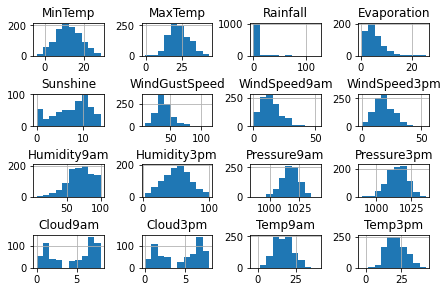

Skewness:


MinTemp          0.104990
MaxTemp          0.294201
Rainfall         8.499077
Evaporation      1.624399
Sunshine        -0.515384
WindGustSpeed    1.001696
WindSpeed9am     0.726155
WindSpeed3pm     0.494159
Humidity9am     -0.442775
Humidity3pm      0.031312
Pressure9am     -0.297925
Pressure3pm     -0.201687
Cloud9am        -0.296792
Cloud3pm        -0.217657
Temp9am          0.162631
Temp3pm          0.280177
dtype: float64

In [12]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df1.drop('RainTomorrow', axis = 1).hist()

# adjust the subplots

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df1.drop('RainTomorrow', axis = 1).skew()

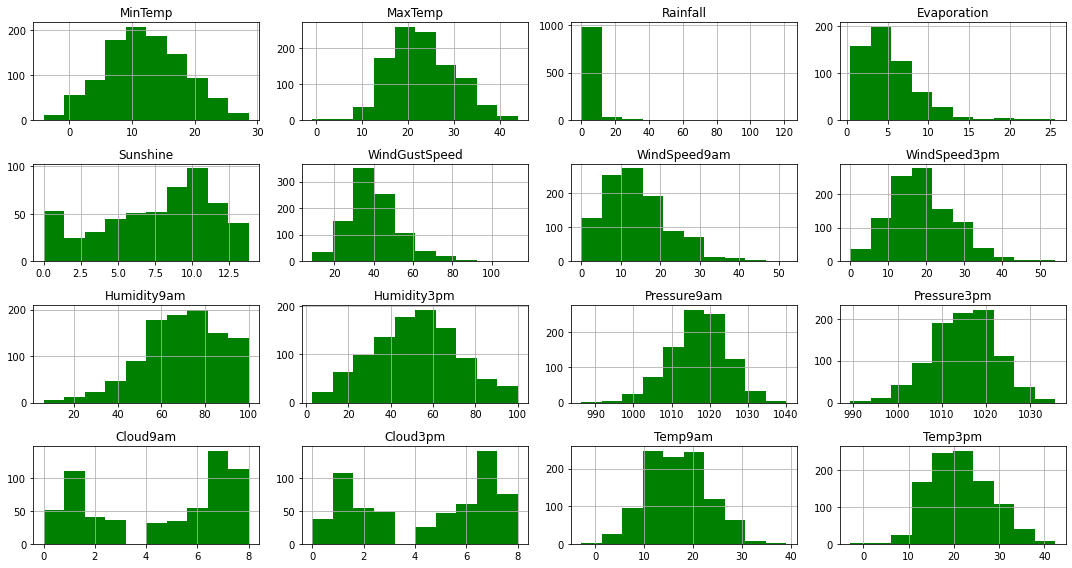

Skewness:
MinTemp          0.104990
MaxTemp          0.294201
Rainfall         8.499077
Evaporation      1.624399
Sunshine        -0.515384
WindGustSpeed    1.001696
WindSpeed9am     0.726155
WindSpeed3pm     0.494159
Humidity9am     -0.442775
Humidity3pm      0.031312
Pressure9am     -0.297925
Pressure3pm     -0.201687
Cloud9am        -0.296792
Cloud3pm        -0.217657
Temp9am          0.162631
Temp3pm          0.280177
dtype: float64
Skewness:

MinTemp         -0.055009
MaxTemp          0.035168
Rainfall         0.946003
Evaporation     -0.004149
Sunshine        -0.358847
WindGustSpeed    0.006287
WindSpeed9am    -0.038106
WindSpeed3pm     0.007318
Humidity9am     -0.095542
Humidity3pm     -0.077005
Pressure9am      0.004309
Pressure3pm     -0.000212
Cloud9am        -0.345565
Cloud3pm        -0.290687
Temp9am          0.013067
Temp3pm          0.076784
dtype: float64
       MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     0.656502 -0.351342  1.810998       

In [13]:
from sklearn.preprocessing import PowerTransformer
# select the numeric variables
df_num = df1.select_dtypes(include=np.number)

# plot the histograms
df_num.hist(figsize=(15, 8), color='green')

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

# print the skewness for each numeric independent variable
print('Skewness:')
print(df_num.skew())

# separate the numeric variables
df_num = df1.select_dtypes(include=['float64'])

# initialize the power transformer
pt = PowerTransformer(method='yeo-johnson')

# transform the data
df_num_transformed = pd.DataFrame(pt.fit_transform(df_num), columns=df_num.columns)

# print the skewness for each numeric independent variable
print('Skewness:')
print()
print(df_num_transformed.skew())
# replace the numeric columns in df_rain with the transformed columns
df1[df_num.columns] = df_num_transformed
print(df_num_transformed)


**Distribution of categoric independent variable.**


In [14]:
# use countplot() to plot the count of each label in the categorical variable 
df2=df1.select_dtypes(include="object")
df2.drop(['RainTomorrow'],axis=1,inplace=True)
df2

,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,S,SSW,SW,Yes
1,WSW,SSW,WSW,Yes
2,WNW,WNW,WNW,No
3,SSE,SSE,SE,No
4,N,NE,W,No
...,...,...,...,...
1035,WNW,W,NW,Yes
1036,WNW,NNE,NNW,No
1037,E,ENE,NE,No
1038,E,E,ESE,No


RainToday


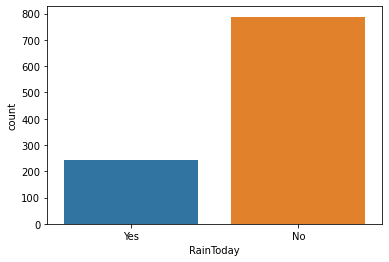

WindGustDir


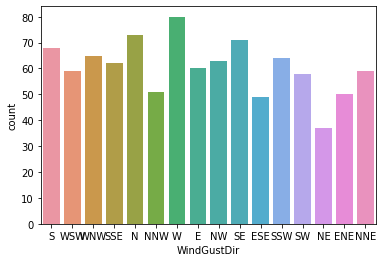

WindDir9am


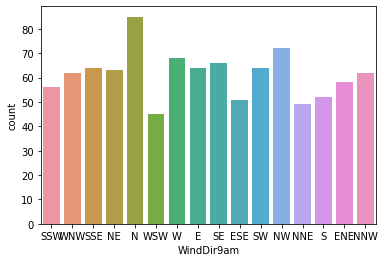

WindDir3pm


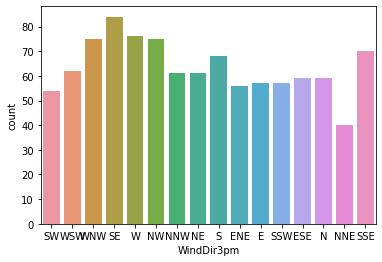

In [15]:
data =df2[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
from matplotlib import pyplot as plt # used this library to avoid overwriting to same graph
for i in data.columns:
    print(i)
    sns.countplot(x=data[i]) #here x is assgined to plot the graph horizontally
    plt.show() #plotting each plot and displaying individually
    


#### Distribution of dependent variable.

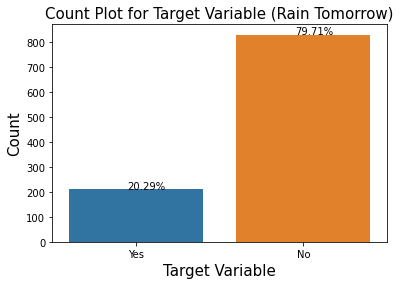

In [16]:
sns.countplot(df1['RainTomorrow'])
plt.text(x = -0.05, y = df1['RainTomorrow'].value_counts()['Yes'] + 1, s = str(round((df1['RainTomorrow'].value_counts()['Yes'])*100/len(df1['RainTomorrow']),2)) + '%')
plt.text(x = 0.95, y = df1['RainTomorrow'].value_counts()['No'] +1, s = str(round((df1['RainTomorrow'].value_counts()['No'] )*100/len(df1['RainTomorrow']),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Rain Tomorrow)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

MinTemp


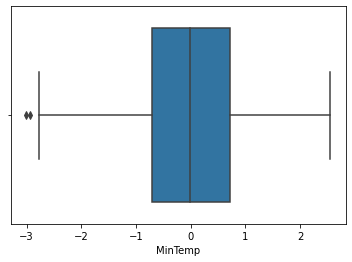

MaxTemp


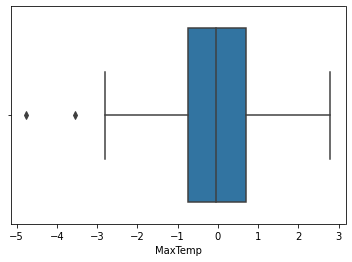

Rainfall


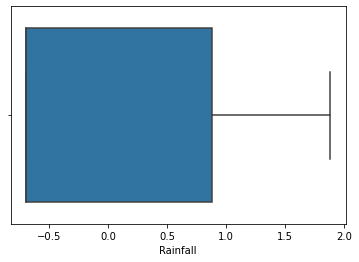

Evaporation


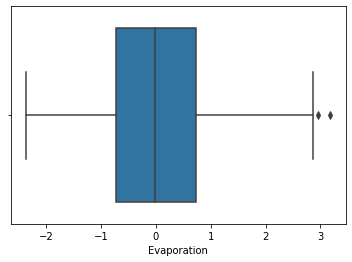

Sunshine


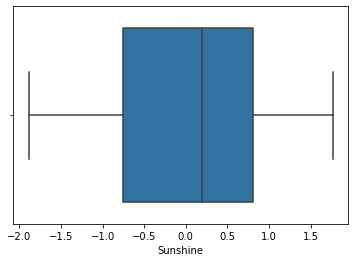

WindGustSpeed


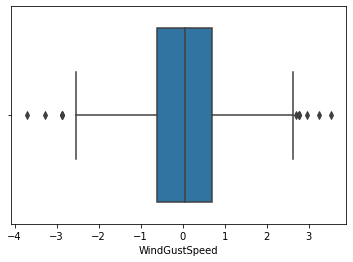

WindSpeed9am


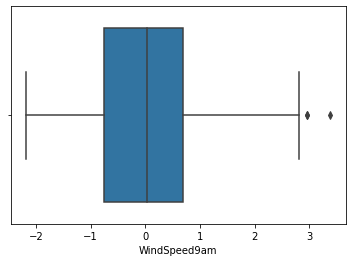

WindSpeed3pm


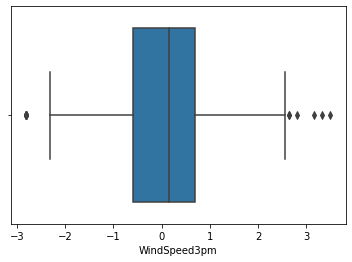

Humidity9am


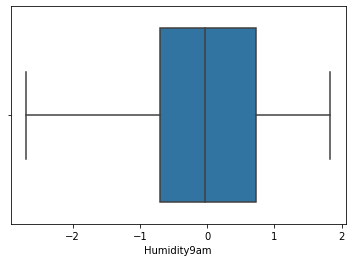

Humidity3pm


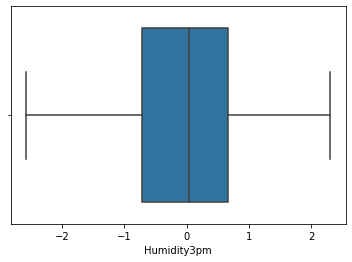

Pressure9am


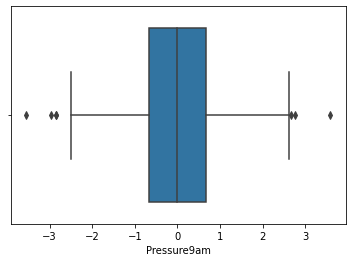

Pressure3pm


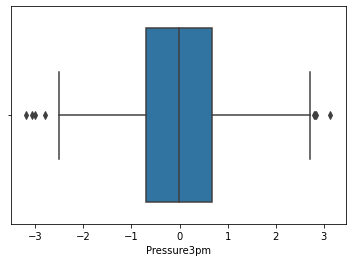

Cloud9am


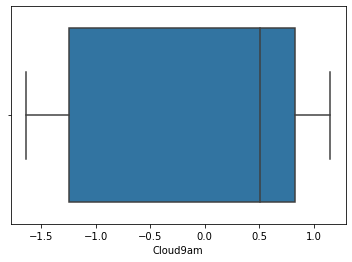

Cloud3pm


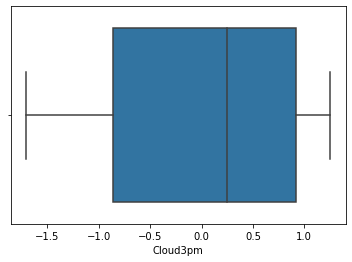

Temp9am


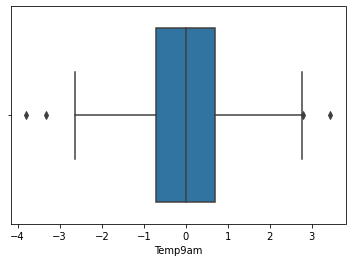

Temp3pm


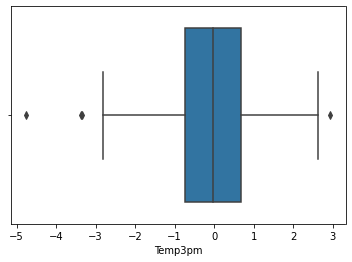

In [17]:
#Outlier Detection
data =df1.select_dtypes(exclude="object")
from matplotlib import pyplot as plt # used this library to avoid overwriting to same graph
for i in data.columns:
    print(i)
    sns.boxplot(x=data[i]) #here x is assgined to plot the graph horizontally
    plt.show() #plotting each plot and displaying individually
    



# Inference:
- <b>Distribution of numeric independent variables.</b>:

i)The independent variables are those being used to train the model. In our project, we have 20 independent variables out of which 16 columns are numeric.
df1.drop('RainTomorrow', axis = 1).hist()  - we dropped the target/dependendent variable using drop() function and  Used the Histogram to see the distribution of the independent numeric variable.<br>
ii) As we see the histogram of independent numeric variable, We observed that the column "Rainfall",,"Evaporation","MinTemp","MaxTemp"  are positively skewed and the columns "Sunshine","Humidity","Pressure9pm","Pressure3am" are negatively skewed.  df.skew() is the function used to check the skewness of the data. <br>
ii) so to reduce the skewness of the data, we applied YeoJohnson transformation on 'df1'.The advantage of the Yeo-Johnson transformation over the box-cox transformation is that, by default, the input (or parameter) of the Yeo-Johnson transformation can be a negative value and we used histogram to see the distribution of the data.<br>
- <b>Distribution of categoric independent variable.</b>:
We used countplot to see the distribution of categoric independent variable. We have four categorical variable - 'RainToday','WindGustDir','WindDir9am','WindDir3pm'.sns.countplot() is function we used to plot distribution. From this countplot we identify that the "RainToday" has more "No" class label as compared to "Yes". and Wind Gust direction has more observation  at "W" i.e west direction.
- <b>Distribution of dependent variable.</b>: Dependent variable is a target variable/final outcome which we need to predict. In our case ,"Rain Tomorrow" is a target column which we need to predict by using other parameters.  Countplot is used to see the distribution of dependent variable, we used sns.countplot() function. From the count plot of "RainTommorrow", we identifyied the dataset is "IMBALANCED" . There  are 79.71% observation is with class label "No" and 20.29% observations with "yes". This shows bias in the dataset. So the  given "rainfall_prediction" is imbalanced dataset


<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [18]:
df1.isnull().sum()

MinTemp            5
MaxTemp            5
Rainfall          11
Evaporation      458
Sunshine         507
WindGustDir       71
WindGustSpeed     71
WindDir9am        59
WindDir3pm        26
WindSpeed9am       8
WindSpeed3pm      17
Humidity9am        9
Humidity3pm       24
Pressure9am      111
Pressure3pm      108
Cloud9am         427
Cloud3pm         443
Temp9am            6
Temp3pm           18
RainToday         11
RainTomorrow       0
dtype: int64

In [19]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df1.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Sunshine,507,48.750000
Evaporation,458,44.038462
Cloud3pm,443,42.596154
Cloud9am,427,41.057692
Pressure9am,111,10.673077
Pressure3pm,108,10.384615
WindGustDir,71,6.826923
WindGustSpeed,71,6.826923
WindDir9am,59,5.673077
WindDir3pm,26,2.500000


In [20]:

num_cols = ['Sunshine','Cloud3pm','Cloud9am','MinTemp', 'Humidity3pm']
cat_cols = ['RainToday','WindGustDir','WindDir9am','WindDir3pm']
num_cols_outliers = ['MaxTemp', 'Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

for col in num_cols:
    df1[col] = df1[col].fillna(df1[col].mean())

for col in cat_cols:
    df1[col] = df1[col].fillna(df1[col].mode()[0])
    
for col in num_cols_outliers:
    df1[col] = df1[col].fillna(df1[col].mean())
    

In [21]:
df1.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Inference:
- df.isnull.sum() - It is function used to count the number of null values for each column in dataframe. 
- Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False) - we also commputed the percentage of the null values present in each columns
-  We could see the column "Sunshine","Evaporation", "Cloud3pm" and "Cloud9am" has more null values. It is about more than 40% of data is null.
- To handle the null values , we used the imputation techniques. The statstical Imputation is used to treat the null values
- We checked the presence  of outliers for all columns in the dataset, Based on that we replaced the null value with mean ,median,mode. we used boxplot to identify the presence of outliers..
-   ['MaxTemp', 'Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'] these columns null values are replaced with median since  these ccolummns contains outliers.
-  ['Sunshine','Cloud3pm','Cloud9am','MinTemp', 'Humidity3pm'] - these numerical columns null value is replaced with mean
- The categorical columns 'WindGustDir','WindDir9am','WindDir3pm', 'raintoady' null values are replaced with mode
-  After done with the imputation, we checked again the null value counts using isnull().sum() function. The counts shows 0. 



<a id="dummy"></a>
## 2.6 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [23]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
df1['Label_raintomorrow']=lblencoder.fit_transform(df1['RainTomorrow'])

In [24]:
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Label_raintomorrow
0,0.656502,-0.351342,1.810998,2.756482e-16,-2.349590e-16,S,1.544685,SSW,SW,2.442634,...,1.934305,1.226448e-01,3.412276e-01,-1.241944e+00,1.252493e+00,0.123056,-0.872719,Yes,Yes,1
1,1.041761,0.451833,1.857185,3.039936e-01,1.159927e+00,WSW,0.059860,SSW,WSW,0.794926,...,-0.761588,-1.651764e+00,-1.524783e+00,8.309664e-01,-1.265987e+00,0.888287,0.563184,Yes,No,0
2,-0.507424,-0.958935,-0.694282,2.756482e-16,-2.349590e-16,WNW,1.168150,WNW,WNW,0.693755,...,-0.508746,-4.550241e-17,-7.427743e-16,-1.398193e-16,-1.584439e-16,-0.586004,-0.952249,No,No,0
3,2.095096,1.537136,-0.041217,1.826794e-01,-2.183917e-01,SSE,0.208773,SSE,SE,-0.208219,...,0.377551,-1.024127e+00,-1.041904e+00,5.054857e-01,2.427855e-01,2.208499,1.470187,No,No,0
4,-1.340833,0.035211,-0.694282,2.756482e-16,-2.349590e-16,N,-0.892648,NE,W,0.036051,...,-1.121876,-4.550241e-17,-7.427743e-16,-1.398193e-16,-1.584439e-16,-0.435408,-0.026011,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,-0.857370,-1.488528,1.688862,2.756482e-16,-2.349590e-16,WNW,0.813201,W,NW,1.800227,...,1.141359,-1.698350e+00,-1.374129e+00,8.309664e-01,1.252493e+00,-1.202671,-1.324734,Yes,No,0
1036,2.493179,1.885951,-0.694282,9.572056e-01,1.219954e+00,WNW,-0.427733,NNE,NNW,0.693755,...,-1.018104,-9.112407e-01,-1.119283e+00,-5.108824e-01,-1.265987e+00,2.163348,2.005209,No,No,0
1037,0.202027,-0.534460,-0.694282,-4.746466e-01,-1.246438e+00,E,-0.892648,ENE,NE,0.036051,...,0.474111,9.746950e-01,9.642436e-01,8.309664e-01,9.233732e-01,-0.023288,-0.497302,No,No,0
1038,0.249465,0.536312,-0.694282,2.756482e-16,-2.349590e-16,E,-0.095425,E,ESE,0.484930,...,-1.069901,1.095134e+00,8.464726e-01,-1.398193e-16,-1.265987e+00,0.556452,0.678790,No,No,0


In [25]:
df1.drop(['RainTomorrow'],axis=1,inplace=True)

In [26]:
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Label_raintomorrow
0,0.656502,-0.351342,1.810998,2.756482e-16,-2.349590e-16,S,1.544685,SSW,SW,2.442634,...,-0.095994,1.934305,1.226448e-01,3.412276e-01,-1.241944e+00,1.252493e+00,0.123056,-0.872719,Yes,1
1,1.041761,0.451833,1.857185,3.039936e-01,1.159927e+00,WSW,0.059860,SSW,WSW,0.794926,...,-0.589850,-0.761588,-1.651764e+00,-1.524783e+00,8.309664e-01,-1.265987e+00,0.888287,0.563184,Yes,0
2,-0.507424,-0.958935,-0.694282,2.756482e-16,-2.349590e-16,WNW,1.168150,WNW,WNW,0.693755,...,-1.519058,-0.508746,-4.550241e-17,-7.427743e-16,-1.398193e-16,-1.584439e-16,-0.586004,-0.952249,No,0
3,2.095096,1.537136,-0.041217,1.826794e-01,-2.183917e-01,SSE,0.208773,SSE,SE,-0.208219,...,-0.374334,0.377551,-1.024127e+00,-1.041904e+00,5.054857e-01,2.427855e-01,2.208499,1.470187,No,0
4,-1.340833,0.035211,-0.694282,2.756482e-16,-2.349590e-16,N,-0.892648,NE,W,0.036051,...,-0.798771,-1.121876,-4.550241e-17,-7.427743e-16,-1.398193e-16,-1.584439e-16,-0.435408,-0.026011,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,-0.857370,-1.488528,1.688862,2.756482e-16,-2.349590e-16,WNW,0.813201,W,NW,1.800227,...,1.764397,1.141359,-1.698350e+00,-1.374129e+00,8.309664e-01,1.252493e+00,-1.202671,-1.324734,Yes,0
1036,2.493179,1.885951,-0.694282,9.572056e-01,1.219954e+00,WNW,-0.427733,NNE,NNW,0.693755,...,-0.374334,-1.018104,-9.112407e-01,-1.119283e+00,-5.108824e-01,-1.265987e+00,2.163348,2.005209,No,0
1037,0.202027,-0.534460,-0.694282,-4.746466e-01,-1.246438e+00,E,-0.892648,ENE,NE,0.036051,...,-0.428819,0.474111,9.746950e-01,9.642436e-01,8.309664e-01,9.233732e-01,-0.023288,-0.497302,No,0
1038,0.249465,0.536312,-0.694282,2.756482e-16,-2.349590e-16,E,-0.095425,E,ESE,0.484930,...,-0.900685,-1.069901,1.095134e+00,8.464726e-01,-1.398193e-16,-1.265987e+00,0.556452,0.678790,No,0


In [27]:
# store the target variable 'Rain Tomorrow' in a dataframe 'df_target'
df_target = df1['Label_raintomorrow']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = df1.drop('Label_raintomorrow', axis = 1)

#### Filter numerical and categorical variables.

In [28]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [29]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [30]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [31]:
dummy_var

,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Inference:
- <b>Split the dependent and independent variables:</b><br>
i) df_target = df1['Label_raintomorrow']  - df_target dataframe contains the dependent variable. The dependent variable in "Raintomorrow" and we have done label encoding for target variable and we stored it in df_target dataframe.<br>
ii) df_feature = df1.drop('Label_raintomorrow', axis = 1) - df_feature contains the independent variable. 'df1' dataframe contains both dependent and independent variable. we used 'drop' function to drop only the dependent variabe("raintomorrow") from df1 and stored its results in 'df_feature'. 'df_feature' dataframe contains only independent variable.<br>

- <b> Filter numerical and categorical variables.</b>:<br>
i) df_num = df_feature.select_dtypes(include = [np.number]) -  select_dtype() is function is used to select the particular datatype columns from dataframe. Here, we selected only the"numerical" column by passing "np.number" to the include parameter.<br>
ii) df_cat = df_feature.select_dtypes(include = [np.object]) -  select_dtype() is function is used to select the particular datatype columns from dataframe. Here, we selected only the"categorical" column by passing "np.object" to the include parameter.<br>

- <b> Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.</b>:
The logistic Regression model cannot be built with categorical columns without encoding. The encoding plays major role in building the model. Here, we encoded all 4 categorical columns. The n-1 dummy encoding is used to enccode the ccategorical variable present in the Rainfall prediction. A dummy variable is assigned a value of 1 if a particular condition is met and a value of 0 otherwise. The number of dummy variables for n different classes must equal n-1.




<a id="scale"></a>
## 2.7 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [32]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [33]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.658086,-0.352190,1.820652,3.158093e-18,-1.454809e-19,1.600276,2.452083,0.258458,-0.096412,1.957018,...,0,0,0,0,0,1,0,0,0,1
1,1.044274,0.452923,1.867085,4.063681e-01,1.620256e+00,0.062014,0.798001,0.483932,-0.592418,-0.770531,...,0,0,0,0,0,0,0,0,1,1
2,-0.508648,-0.961248,-0.697983,3.158093e-18,-1.454809e-19,1.210190,0.696439,0.483932,-1.525674,-0.514719,...,0,0,0,0,0,0,0,1,0,0
3,2.100151,1.540844,-0.041437,2.441994e-01,-3.050628e-01,0.216286,-0.209024,0.143141,-0.375964,0.381984,...,0,0,1,0,0,0,0,0,0,0
4,-1.344068,0.035296,-0.697983,3.158093e-18,-1.454809e-19,-0.924773,0.036190,-1.443331,-0.802250,-1.135049,...,0,0,0,0,0,0,1,0,0,0


# Inference:

- <b>Scale the Data</b><br>
i) We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.<br>
ii) Here, we used standard scalar to scale all numerical variables. Standard scalar transforms the data and replaces the values by their z-score,, with mean=0 and Standard deviation=1<br>
iii) Standard scalar is available in the sklearn.preprocessing libarary<br>
iv) X_scaler = StandardScaler() num_scaled = X_scaler.fit_transform(df_num) - we sccale numerical columns present 'df_num" dataframe and store the scaled data in 'df_num_scaled'<br>.

- <b> Concatenate scaled numerical and dummy encoded categorical variables:</b><br>
i) X = pd.concat([df_num_scaled, dummy_var], axis = 1) - we used pd.cconcate() function to joins the 'df_num_scaled' and 'dummy_var' dataframmes and created a  concated dataframe 'X'. The dataframe ccontains all the independent variables required to build the model



<a id="split"></a>
## 2.8 Train-Test Split

Before applying various classification techniques to predict the patient having cardiovascular disease or not, let us split the dataset in train and test set.

In [34]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 42, test_size = 0.2,stratify=df_target)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (832, 63)
y_train (832,)
X_test (208, 63)
y_test (208,)


# Inference:
- The train_test_split() method  of sklearn is used to split our data into train and test sets. 
- First, we need to divide our data into features (X) and labels (df_target). The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. 
- Here, X variable contains the indepedent variables and y contains the target variable.  
- The "test_size" parameter is used to pass the proportion to perform the split on the dataset. Here , we splitted the 70%  of data for training and 20% data for testing
- The rainfall_detection dataset is <b>imbalanced dataset</b>. The class labels are more biased in the observations. In order to make the dataset balanced and to reduce bias , we keep the <b>'stratify=df_target'</b>  parammeter in traintestsplit  function.stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
- X_train (832, 63),y_train (832,),X_test (208, 63), y_test (208,) are the shape of training and testing dataset

<a id="logit"></a>
# 3. Logistic Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [35]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.317718
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Label_raintomorrow   No. Observations:                  832
Model:                          Logit   Df Residuals:                      769
Method:                           MLE   Df Model:                           62
Date:                Tue, 02 May 2023   Pseudo R-squ.:                  0.3705
Time:                        16:55:25   Log-Likelihood:                -264.34
converged:                       True   LL-Null:                       -419.91
Covariance Type:            nonrobust   LLR p-value:                 7.284e-35
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.4178      0.846     -2.859      0.004      -4.075      -0.761
MinTemp       

**Calculate the AIC (Akaike Information Criterion) value.**

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [36]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 654.6833924767091


We can use the AIC value to compare different models created on the same dataset.

# Inference:
- Logistic Regression : This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

- The Pseudo R-squ. obtained from the above model summary is the value of McFadden's R-squared. This value can be obtained from the formula:
    <p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>
 The LLR p-value is less than 0.05, implies that the model is significant. Here, we got the LLR  value as 0.37
 
 - Cox & Snell R-squared: The convergence of the logistic model can be determined by the R-squared value. The maximum of Cox & Snell R-squared is always less than 1. 
 
 - AIC (Akaike Information Criterion) value is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.We can use the AIC value to compare different models created on the same dataset. Here, we got aic value as 654.6 for our logistic regression model.
 
 - logreg = sm.Logit(y_train, X_train).fit() print(logreg.summary()) -  'logreg' is our logistic regression model. we build model using statistical model libarary function 'Logit()' and passed our X_train and y_train for training the model.  logreg.summary()  gives the summary report for our logistic regression model.
 
 - logeg.aic  is function to get the AIC value for the 'logreg' model.

### Interpret the odds for each variable 

In [37]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.089115
MinTemp,0.767572
MaxTemp,0.801625
Rainfall,1.393829
Evaporation,1.134036
...,...
WindDir3pm_SW,0.767780
WindDir3pm_W,1.563405
WindDir3pm_WNW,0.655693
WindDir3pm_WSW,1.217716


**Interpretation:** 

Write the interpretation of How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?

# Inference:
odds_const: The odds of getting an  Rainfall tomorrow  is 0.0891155, considering all other variables take zero value 

odds_Min_Temp = 0.767, it implies that the odds of getting  rainfall tomorrow increases by a factor of 0.767 due to one unit increase in the minimum temperature, keeping other variables constant

odds_Max_Temp = 0.8016, it implies that the odds of getting  rainfall tommorrow increases by a factor of 0.8016 due to one unit increase in the maximum temperature, keeping other variables constant

odds_Rainfall =1.393829 , it implies that the odds of getting  rainfall tommorrow increases by a factor of 1.393829 due to one unit increase in the Rainfall , keeping other variables constant

odds_WindDir3pm_SW	 =  0.767780, it implies that the odds of getting  rainfall tommorrow increases by a factor of 0.767780 due to one unit increase in the wind direction, keeping other variables constant

odds_WindDir3pm_WSW	 = 1.217716, it implies that the odds of getting  rainfall tommorrow increases by a factor of  1.217716due to one unit increase in the wind direction, keeping other variables constant

odds_RainToday_Yes = 1.065559, it implies that the odds of getting  rainfall tommorrow increases by a factor of 0.8016 due to one unit increase in the Rain today_yes, keeping other variables constant

- similarly, if  there is  one unit increases in other variables then the  odds of getting  rainfall tommorrow increases by a its corresponding factor value




**Do predictions on the test set.**

In [38]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

175    0.075627
859    0.004126
772    0.163680
203    0.008915
616    0.045944
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [39]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [40]:
# print the first five observations of y_pred
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#### Plot the confusion matrix.

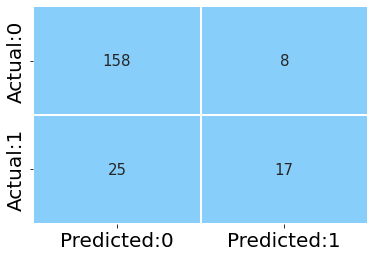

In [41]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':15})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [42]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

**Compute various performance metrics.**

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [43]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.68

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [44]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.40476190476190477

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [45]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.9518072289156626

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [46]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.5074626865671642

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [47]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8413461538461539

# Inference:
-  we used our model and done predictions on test data . Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.
- we also drawn the confusion matrix with TP,FP,TN,FN and calculated the metrics for our logistic regression model
- For our dataset, both the values for accuracy and f1-score are not equal since it is a imbalanced dataset. so, accuracy is not a good metrics for this rainfall_prediction dataset. Our accuracy score is 0.841 which is 84.1%

We can also calculate the above measures using the `classification_report()`

In [48]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       166
           1       0.68      0.40      0.51        42

    accuracy                           0.84       208
   macro avg       0.77      0.68      0.71       208
weighted avg       0.83      0.84      0.83       208



**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [49]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.4200743494423792


# Inference: 
- Kappa score: It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.
- As the kappa score for the full model (with cut-off probability 0.5) is 0.4200, we can say that there is substantial agreement between the actual and predicted values.
-The kappa score can be used to determine the level of agreement between two observers or between an observer and a classification model. In this case, we can use the kappa score to determine the level of agreement between the actual data and the model's predictions. A kappa score of 0.4200 suggests that the level of agreement is moderate.

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

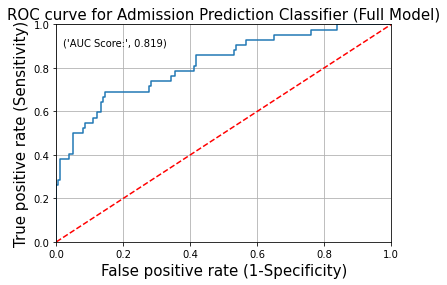

In [50]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

# Inference:
- ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.
-The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
- From the above plot, we can see that our classifier (logistic regression) is away from the dotted line; with the AUC score 0.819.
- as the score is significantly higher than 0.5. This means that the classifier is capable of distinguishing between the positive and negative classes with a fair degree of accuracy. However, the score is not close to 1, so there is still room for improvement in the model's performance.

<a id="cut_off"></a>
## 3.1 Identify the Best Cut-off Value

<a id="youden"></a>
### 3.1.1 Youden's Index

In [51]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.690476,0.144578,0.241623,0.545898
1,0.666667,0.138554,0.271286,0.528112
2,0.666667,0.144578,0.252101,0.522088
3,0.642857,0.132530,0.273661,0.510327
4,0.642857,0.138554,0.272906,0.504303


#### Plot the confusion matrix, with the optimal threshold computed using Youden's index method.

In [52]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.24 else 1 for x in y_pred_prob]

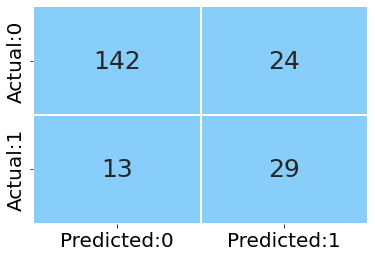

In [53]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics using classification report.**

In [54]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.92      0.86      0.88       166
           1       0.55      0.69      0.61        42

    accuracy                           0.82       208
   macro avg       0.73      0.77      0.75       208
weighted avg       0.84      0.82      0.83       208



# Inference:
- The performance measures that we obtained above, are for the cut_off = 0.5. Now, let us consider a list of values as cut-off and calculate the different performance measures.
- In the above method, we passed the list of values for the cut-off. But, this method is not efficient as one can pass different values and obtain a cut-off based on the passed values.To obtain the optimal cut-off value we use the following methods:  i) Youden's Index   ii)Cost-based Method
- Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

- As we can see that the optimal cut-off probability is approximately 0.24 for Rainfall_prediction dataset. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.24, then consider it to be 0 else consider it to be 1.

- As the kappa score for the full model (with cut-off probability 0.24) is 0.49, we can say that there is substantial agreement between the actual and predicted values.
The kappa score can be used to determine the level of agreement between two observers or between an observer and a classification model. In this case, we can use the kappa score to determine the level of agreement between the actual data and the model's predictions. A kappa score of 0.49 suggests that the level of agreement is moderate.


- From the classification report generated based on optimal cutoff, we can see the accuracy is of 82% and Recall is of 0.69%. Since our objective is to predict the rainfall for tomorrow, Both FP and FN is important so we can consider the the F1 score as our metrics to evaluate the model performance. our F1 score is 0.61 which means there are 61% acccurate in predicting the occuranace of rainfall tomorrow.

- accuracy is not a good metrics for this rainfall_prediction dataset because the dataset is biased and it is a immbalanced dataset. Our accuracy score is 0.841 which is 82% 

- The precision score of 0.55 suggests that, out of all the instances where the model predicted rain, 55% of them actually had rain the next day. This indicates that the model is relatively cautious when predicting rainfall.

- The recall score of approximately 69% indicates that the model is able to identify 69% of the actual rainy days. This means that the model is not very sensitive in detecting rainy days and may miss some of them.

- The F1 score, which is a harmonic mean of precision and recall, is 0.61, indicating that the model has a moderate balance between precision and recall. The F1 score provides a single metric that considers both false positives and false negatives, which is useful when dealing with imbalanced datasets.

- In conclusion, the logistic regression model has an overall moderate performance in predicting 'RainfallTomorrow', with a good specificity score and a moderate balance between precision and recall. However, there is room for improvement, especially in increasing the recall score to better identify rainy days. 

In [55]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_youden)

# print the kappa value
print('kappa value:',kappa)


kappa value: 0.49725633655604906


# Inference:
As the kappa score for the full model (with cut-off probability 0.24) is 0.49, we can say that there is substantial agreement between the actual and predicted values.
